### KNN - Banknote Authentication Dataset

In [1]:
# Dataset
# the goal is the predict whether a banknote is genuine or forged, 
# binary classification

#### Step 1: Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ['variance','skewness','curtosis','entropy','class']
df = pd.read_csv(url, header=None, names=columns)

#### Step 2: Data Preprocessing

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

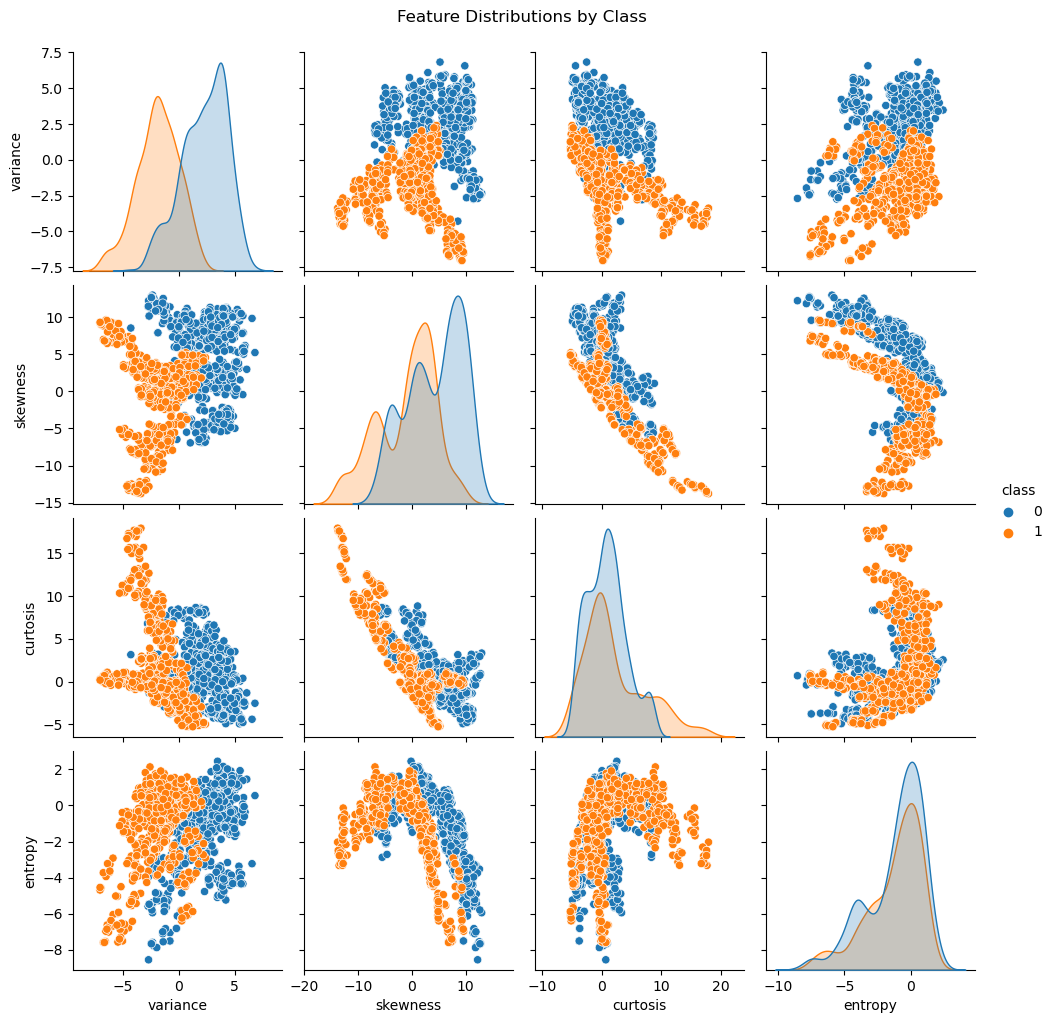

In [9]:
sns.pairplot(df, hue='class')
plt.suptitle('Feature Distributions by Class', y=1.02)
plt.show()

In [10]:
X = df.drop('class', axis=1)
y = df['class']

#### Step 3: Feature Scaling

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Step 4: Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                   random_state=42, stratify=y)

In [13]:
#### Step 5: Model Training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Step 5: Model Evaluation

In [14]:
y_pred = knn.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
cm

Confusion Matrix: 


array([[153,   0],
       [  0, 122]], dtype=int64)

In [17]:
cr = classification_report(y_test, y_pred)
print("Classification Report: \n", cr)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



#### Step 6: Trying different K Values

In [18]:
accuracy_list = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracy_list.append(acc)

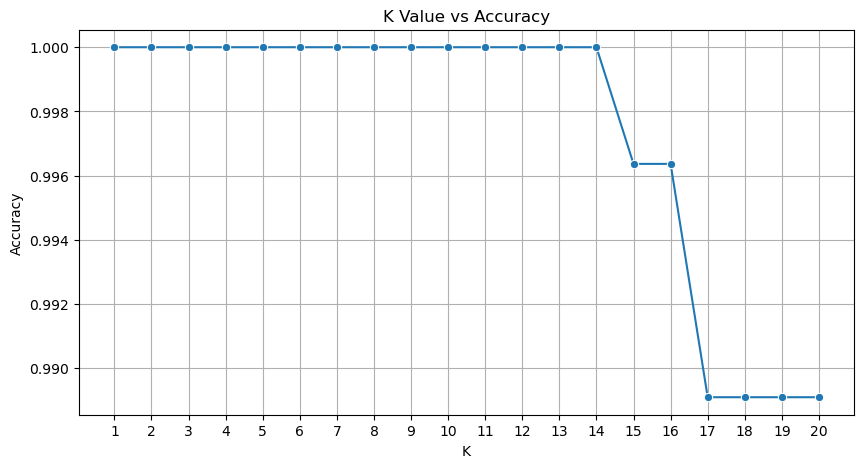

In [19]:
plt.figure(figsize = (10,5))
sns.lineplot(x=range(1, 21), y=accuracy_list, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()